In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

tips = sns.load_dataset('tips')
tips.columns = ['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 's']
tips.head()

,total_bill,tip,sex,smoker,day,time,s
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### GRADED 
Use global and groupby aggregates to answer the following questions

    - What is the average tip amount 
    - What is the average bill amount 
    - What is the average tip by gender 
    - What is the average tip on a sunday by gender 
    - Which party size gives the maximum tip as a percent of total bill amount 

In [4]:
#What is the average tip amount 
print("(1) mean of tip amount: ", tips['tip'].mean())

#What is the average bill amount
print("(2) mean of bill amount: ", tips['total_bill'].mean())

#What is the average tip by gender 
gender = tips.groupby(['sex']).mean()
print("(3) mean of tip by Female: ",gender.iloc[1,1],'\n',"mean of tip by Male: ",gender.iloc[0,1])

#What is the average tip on a sunday by gender 
Sunday=tips[tips['day']=='Sun']
sunday=Sunday.groupby('sex').agg([np.mean]).tip.values
print("(4) average tip on a sunday by Female: ",sunday[1],'\n',
      "average tip on a sunday by Male: ",sunday[0])

#Which party size gives the maximum tip as a percent of total bill amount 
tips['percentage'] = tips.tip/tips.total_bill 
Maxtip = tips[tips.percentage==tips.percentage.max()]
print("(5) party size gives the maximum tip as a percent of total bill amount: ", Maxtip.s.values)

(1) mean of tip amount:  2.9982786885245902
(2) mean of bill amount:  19.785942622950824
(3) mean of tip by Female:  2.833448275862069 
 mean of tip by Male:  3.0896178343949052
(4) average tip on a sunday by Female:  [3.36722222] 
 average tip on a sunday by Male:  [3.22034483]
(5) party size gives the maximum tip as a percent of total bill amount:  [2]


### GRADED
    - Generate a scatter plot of tip amount (y-axis) and total_bill (x-axis)
    - Generate the plots using matplotlib, bokeh and seaborn


Loading BokehJS ...

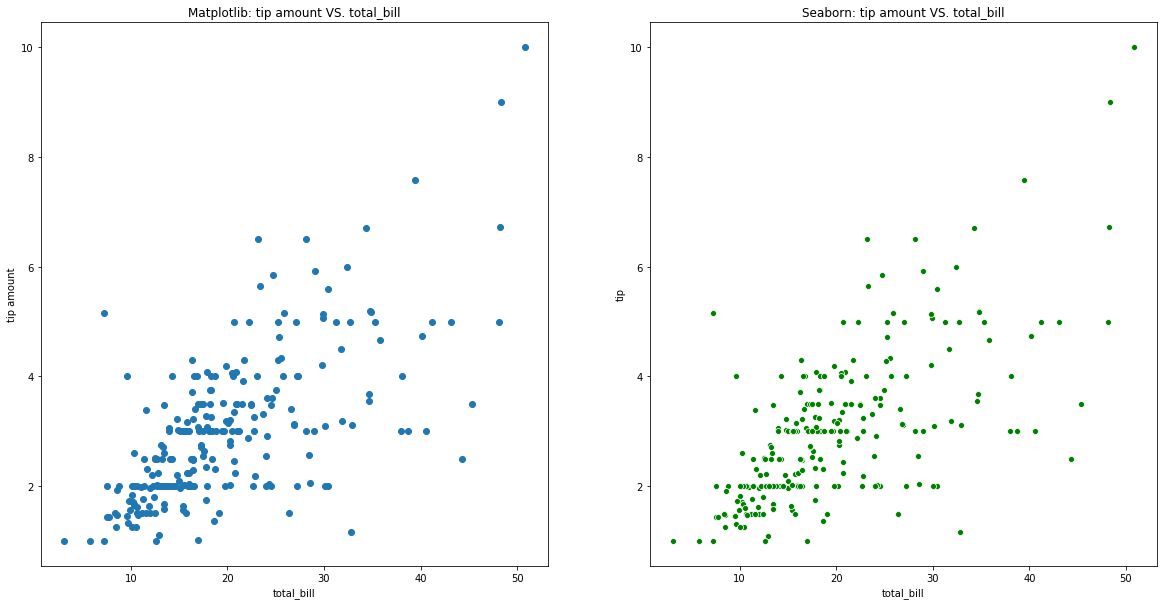

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))

#Generate a scatter plot of tip amount (y-axis) and total_bill (x-axis)
#Generate the plots using bokeh
from bokeh.plotting import figure, output_notebook, show
output_notebook()
p = figure(x_axis_label='total_bill', y_axis_label='tip', title ="Bokeh: tip amount VS. total_bill")
p.circle(tips.total_bill, tips.tip, color='red')
show(p)

#Generate the plots using matplotlib
plt.subplot(1,2,1)
plt.scatter(tips["total_bill"], tips["tip"])
plt.title("Matplotlib: tip amount VS. total_bill")
plt.xlabel("total_bill")
plt.ylabel("tip amount")

#Generate the plots using seaborn
plt.subplot(1,2,2)
sns.scatterplot(x="total_bill", y="tip", data=tips,color='green').set_title('Seaborn: tip amount VS. total_bill')
plt.show()


### GRADED
    - Generate a box plot that shows average bill amount by day of week
    - Generate a box plot that shows average bill amount by gender
    - Show the above two plots side by side
    - Generate the same plots using matplotlib and bokeh

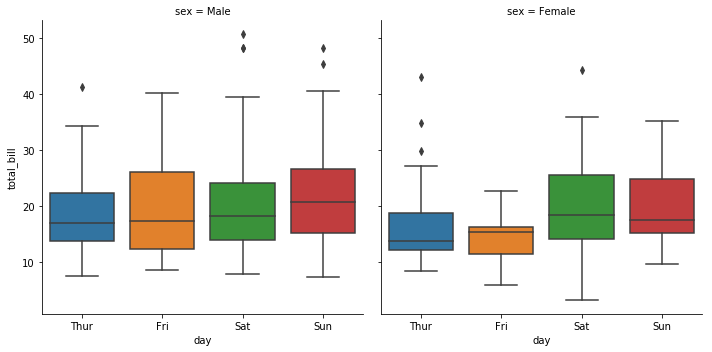

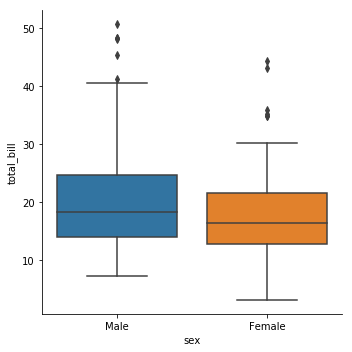

In [173]:
#Generate a box plot that shows average bill amount by day of week
#Generate a box plot that shows average bill amount by gender
#Show the above two plots side by side
import seaborn as sns
sns.catplot(x='day',y='total_bill',kind='box',col='sex', data=tips)
sns.catplot(x='sex',y='total_bill',kind='box', data=tips)

[Text(0,0,'Male'), Text(0,0,'Female')]

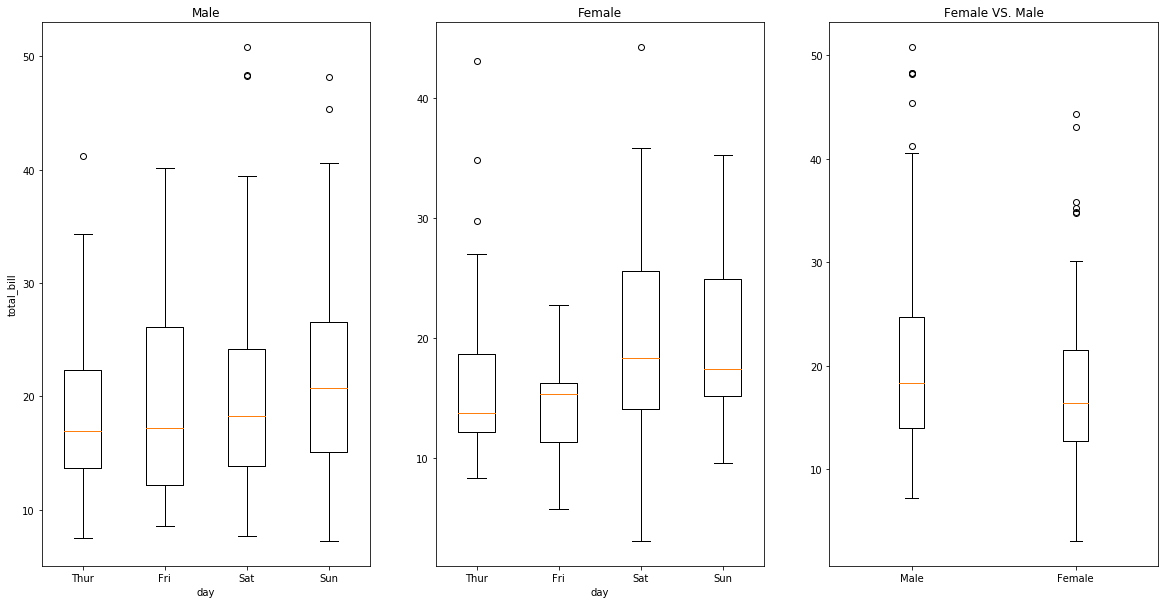

In [220]:
#Generate the same plots using matplotlib
%matplotlib inline
import matplotlib.pyplot as plt 

#Data required to contruct boxplot
Thur = tips[tips['day']=='Thur']   
Fri = tips[tips['day']=='Fri']
Sat = tips[tips['day']=='Sat']
Sun = tips[tips['day']=='Sun']

#Male By Day
Thur_M = Thur[Thur['sex']=='Male']
Fri_M = Fri[Fri['sex']=='Male']
Sat_M = Sat[Sat['sex']=='Male']
Sun_M = Sun[Sun['sex']=='Male']

#Female By Day
Thur_F = Thur[Thur['sex']=='Female']
Fri_F = Fri[Fri['sex']=='Female']
Sat_F = Sat[Sat['sex']=='Female']
Sun_F = Sun[Sun['sex']=='Female']

#Adjust plot size                                         
plt.figure(figsize = (20,10))   

# Boxplot for Male
plt.subplot(1,3,1)
plt.boxplot([Thur_M['total_bill'],Fri_M['total_bill'],
             Sat_M['total_bill'],Sun_M['total_bill']])
plt.title("Male")
plt.xlabel("day")
plt.ylabel("total_bill")
plt.gca().set_xticklabels(['Thur','Fri','Sat','Sun'])

# Boxplot for Female
plt.subplot(1,3,2)
plt.boxplot([Thur_F['total_bill'],Fri_F['total_bill'],
             Sat_F['total_bill'],Sun_F['total_bill']])
plt.title("Female")
plt.xlabel("day")
plt.gca().set_xticklabels(['Thur','Fri','Sat','Sun'])


plt.subplot(1,3,3)
Male = tips[tips['sex']=='Male']
Female = tips[tips['sex']=='Female']
plt.title("Female VS. Male")
plt.boxplot([Male['total_bill'],Female['total_bill']])
plt.gca().set_xticklabels(['Male','Female'])


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
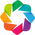

:Layout
   .BoxWhisker.Average_Bill_Amount_by_Male   :BoxWhisker   [day]   (total_bill)
   .BoxWhisker.Average_Bill_Amount_by_Female :BoxWhisker   [day]   (total_bill)
   .BoxWhisker.Average_Bill_Amount_by_Gender :BoxWhisker   [sex]   (total_bill)

In [224]:
import holoviews as hv
hv.extension('bokeh')

import seaborn as sns
tips = sns.load_dataset('tips') 
tips_M = tips[tips['sex']=='Male']
tips_F = tips[tips['sex']=='Female']

title = 'Average Bill Amount by Male'
boxwhisker = hv.BoxWhisker(tips_M, ['day'], 'total_bill', label = title)

title = 'Average Bill Amount by Female'
boxwhisker2 = hv.BoxWhisker(tips_F, ['day'], 'total_bill', label = title)

title2 = 'Average Bill Amount by Gender'
boxwhisker3 = hv.BoxWhisker(tips, ['sex'], 'total_bill', label = title2)

boxwhisker + boxwhisker2 + boxwhisker3

### GRADED
    - Using seaborn lmplot(), examine the linear relationship between tips and total_bill across different dimensions to answer the following
    - Do smoker/non-smoker give a higher tip as a percentage of total_bill (which line has a steeper slope)
    - Are tips larger during lunch or dinner (as a percentage of total_bill)
    - Does the gender that tips the most (as a percentage of total_bill) change between lunch and dinner?
        - Answer the question by visual examination of lmplot output

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(1) There is a strong linear relationship between tips and total_bill .
(2) Smokers tend to tip more than non-smokers.
(3) Tip amount is higher for dinner comparing to lunch.
(4) the Highest tip/bill for lunch and dinner comes from male customers.


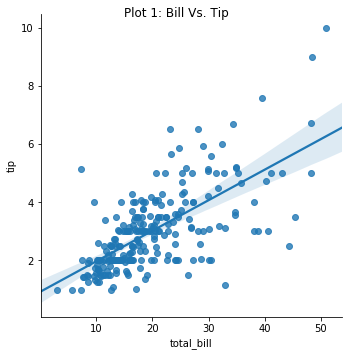

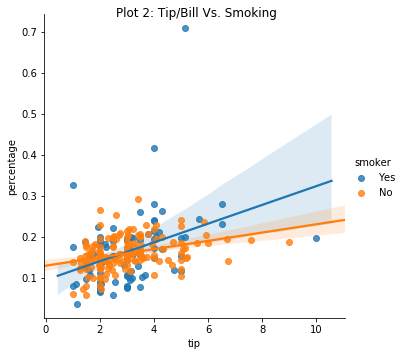

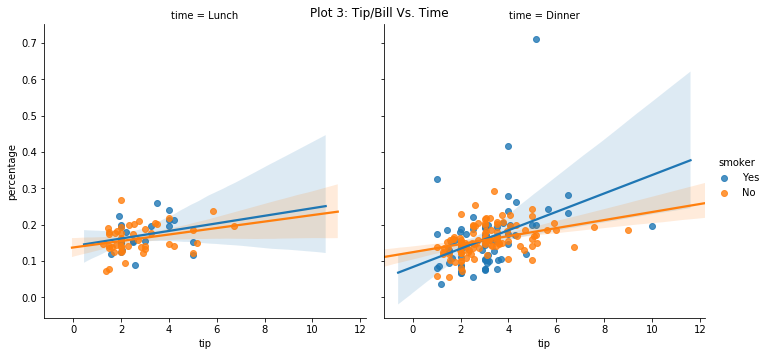

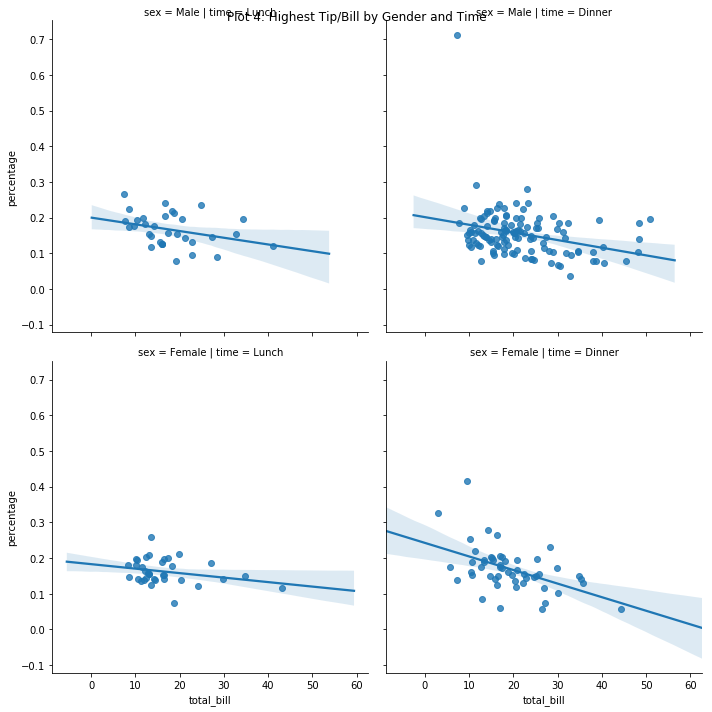

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt
#the linear relationship between tips and total_bill
# Plot 1
plt1 = sns.lmplot(x="total_bill", y="tip", data=tips)
plt1.fig.suptitle('Plot 1: Bill Vs. Tip')
print('(1) There is a strong linear relationship between tips and total_bill .')

# Plot 2
tips['percentage'] = tips.tip/tips.total_bill
plt2 = sns.lmplot(x='tip', y='percentage', hue='smoker', data= tips)
plt2.fig.suptitle('Plot 2: Tip/Bill Vs. Smoking')
print('(2) Smokers tend to tip more than non-smokers.')

# Plot 3
plt3 = sns.lmplot(x='tip', y='percentage', hue='smoker', col='time',data= tips)
plt3.fig.suptitle("Plot 3: Tip/Bill Vs. Time")
print('(3) Tip amount is higher for dinner comparing to lunch.')

# Plot 4
plt4 = sns.lmplot(x="total_bill", y="percentage", col="time", row="sex", data=tips)
plt4.fig.suptitle("Plot 4: Highest Tip/Bill by Gender and Time")
print('(4) the Highest tip/bill for lunch and dinner comes from male customers.')